<a href="https://colab.research.google.com/github/adrielsvr/Sentimen-Analisis-Publik-terhadap-Transportasi-Kereta-di-Jakarta/blob/main/Pemodelan/Pemodelan_Data_KRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from google.colab import drive
from collections import Counter
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_krl = '/content/drive/MyDrive/Tugas Akhir/Dataset Twitter/Dataset/Data_KRL_Label_Sentiment.csv'
data_krl = pd.read_csv(path_krl)
data_krl

,full_text,clean_text,normalisasi,tokenized_text,stopwords_removal,stemming,polarity_score,sentiment
0,"@miaetsumi Hai, Kak. Untuk kartu KRL Commuter ...",hai kak untuk kartu krl commuter line dapat d...,hai kakak untuk kartu krl commuter line dapat ...,"['hai', 'kakak', 'untuk', 'kartu', 'krl', 'com...","['hai', 'kakak', 'kartu', 'krl', 'commuter', '...",hai kakak kartu krl commuter line guna naik mr...,5,Positif
1,"Keujanan di Bogor, menggigil selama di KRL, pa...",keujanan di bogor menggigil selama di krl pas ...,keujanan di bogor menggigil selama di krl pas ...,"['keujanan', 'di', 'bogor', 'menggigil', 'sela...","['keujanan', 'bogor', 'menggigil', 'selama', '...",keujanan bogor gigil lama krl pas jakarta ange...,-9,Negatif
2,"@tanyarlfes Karena aku bkn orang jakarta, tiap...",karena aku bkn orang jakarta tiap kesana seru...,karena aku bkn orang jakarta tiap kesana seru ...,"['karena', 'aku', 'bkn', 'orang', 'jakarta', '...","['aku', 'bkn', 'orang', 'jakarta', 'tiap', 'ke...",aku bkn orang jakarta tiap kesana seru gitu ka...,-29,Negatif
3,@adriansyahyasin Justru di hari lebaran itu KR...,justru di hari lebaran itu krl sepi karena ja...,justru di hari lebaran itu krl sepi karena jak...,"['justru', 'di', 'hari', 'lebaran', 'itu', 'kr...","['justru', 'hari', 'lebaran', 'krl', 'sepi', '...",justru hari lebaran krl sepi jakarta lengang,-7,Negatif
4,@JakartaAwayDay Udah gak ada ruang lagi ah di ...,udah gak ada ruang lagi ah di jakarta mah rib...,sudah tidak ada ruang lagi ah di jakarta mah r...,"['sudah', 'tidak', 'ada', 'ruang', 'lagi', 'ah...","['ruang', 'ah', 'jakarta', 'mah', 'ribut', 'ta...",ruang ah jakarta mah ribut tawur metro mini pa...,-11,Negatif
...,...,...,...,...,...,...,...,...
7421,Separah- parahnya Jalan Thamrin- Sudirman- Sen...,separah parahnya jalan thamrin sudirman senaya...,separah parahnya jalan thamrin sudirman senaya...,"['separah', 'parahnya', 'jalan', 'thamrin', 's...","['separah', 'parahnya', 'jalan', 'thamrin', 's...",parah parah jalan thamrin sudirman senayan kal...,-18,Negatif
7422,"@mrtjakarta Ke timur sampai Jakarta aja, Pak. ...",ke timur sampai jakarta aja pak tumpang tindi...,ke timur sampai jakarta saja bapak tumpang tin...,"['ke', 'timur', 'sampai', 'jakarta', 'saja', '...","['timur', 'jakarta', 'bapak', 'tumpang', 'tind...",timur jakarta bapak tumpang tindih sama krl lr...,-1,Negatif
7423,@adriansyahyasin Dari suburban bangkok ada tra...,dari suburban bangkok ada transport umumnya g...,dari suburban bangkok ada transport umumnya ti...,"['dari', 'suburban', 'bangkok', 'ada', 'transp...","['suburban', 'bangkok', 'transport', 'umumnya'...",suburban bangkok transport umum kakak kalau ka...,-3,Negatif
7424,@Askrlfess Gua yg kerja pp jakarta-bogor naik ...,gua yg kerja pp jakartabogor naik krl agak gi...,aku yang kerja pp jakartabogor naik krl agak g...,"['aku', 'yang', 'kerja', 'pp', 'jakartabogor',...","['aku', 'kerja', 'pp', 'jakartabogor', 'naik',...",aku kerja pp jakartabogor naik krl gimana gitu...,5,Positif


### FIX MODELLING

In [ ]:
# Persiapkan data
tfidf = TfidfVectorizer(max_features=2500, min_df=8, max_df=0.7)
X = tfidf.fit_transform(data_krl['stemming']).toarray()
y = np.array(data_krl['sentiment'])
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# prompt: tampilkan hasil tf-idf yang memiliki nilai >0 dalam bentuk tabel dimana token dalam bentuk baris

import pandas as pd
# Dapatkan fitur-fitur (kata-kata) yang digunakan oleh TfidfVectorizer
feature_names = tfidf.get_feature_names_out()

# Buat DataFrame dari hasil tf-idf
df_tfidf = pd.DataFrame(X_train, columns=feature_names)

# Filter DataFrame untuk menampilkan nilai yang lebih besar dari 0
df_tfidf_filtered = df_tfidf[df_tfidf > 0].stack().reset_index()
df_tfidf_filtered.columns = ['Sample Index', 'Token', 'TF-IDF Value']

# Tampilkan tabel
df_tfidf_filtered


,Sample Index,Token,TF-IDF Value
0,0,acara,0.258534
1,0,aku,0.202362
2,0,allah,0.240899
3,0,apa,0.158762
4,0,banyak,0.145639
...,...,...,...
92619,6682,orang,0.120890
92620,6682,rata,0.230056
92621,6682,rumah,0.144390
92622,6682,sekali,0.211325


#### SVM

In [ ]:
# Inisialisasi model SVM
svc = SVC(kernel='rbf', C=100, gamma=0.1, probability=True)
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

# Evaluasi model SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       633
           1       0.29      0.32      0.31        31
           2       0.70      0.56      0.62        79

    accuracy                           0.89       743
   macro avg       0.64      0.61      0.63       743
weighted avg       0.89      0.89      0.89       743



In [ ]:
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

In [ ]:
print(f'Accuracy Score   : {(acc_svm * 100):.2f}')
print(f'Precision Score  : {(prec_svm * 100):.2f}')
print(f'Recall Score     : {(recall_svm * 100):.2f}')
print(f'f1-score         : {(f1_svm * 100):.2f}')

Accuracy Score   : 89.10
Precision Score  : 88.84
Recall Score     : 89.10
f1-score         : 88.87


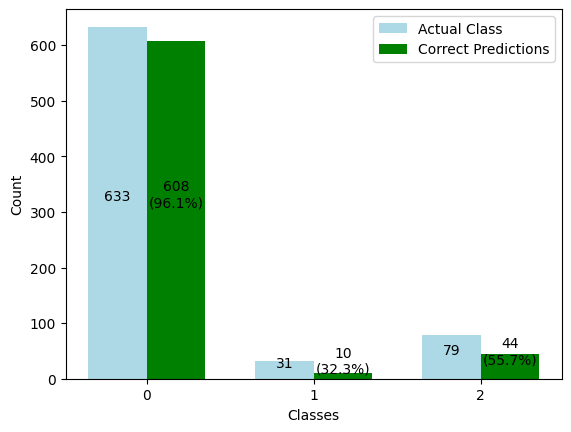

In [ ]:
 # Hitung jumlah prediksi yang benar dan total untuk setiap kelas
correct_predictions = Counter()
total_predictions = Counter()

for true, pred in zip(y_test, y_pred_svm):
    total_predictions[true] += 1
    if true == pred:
        correct_predictions[true] += 1

# Buat plot batang
labels = list(total_predictions.keys())
total_counts = list(total_predictions.values())
correct_counts = [correct_predictions[label] for label in labels]

fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, total_counts, bar_width, label='Actual Class', color='lightblue')
bar2 = ax.bar(index + bar_width, correct_counts, bar_width, label='Correct Predictions', color='green')

# Tambahkan label dan persentase
for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
    ax.text(i, total/2, str(total), ha='center', va='bottom')
    percentage = (correct / total) * 100 if total > 0 else 0
    ax.text(i + bar_width, correct/2, f'{correct}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
# ax.set_title('Prediction Accuracy by Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

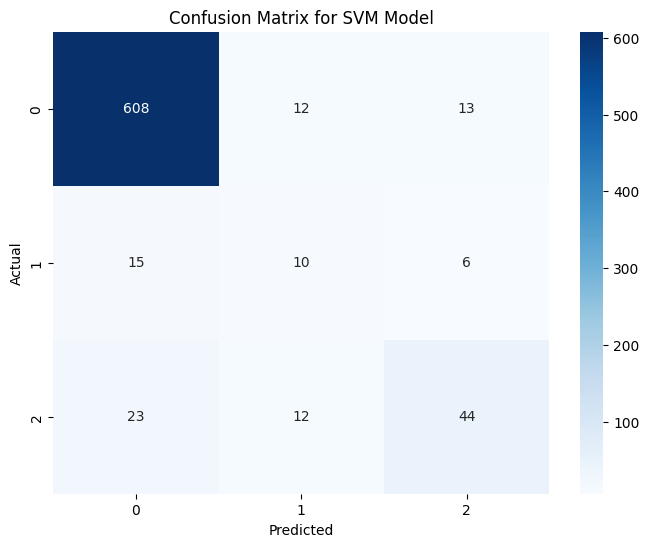

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
logreg = LogisticRegression(C=10, solver='saga', tol=0.01)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluasi model Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       633
           1       0.44      0.23      0.30        31
           2       0.78      0.53      0.63        79

    accuracy                           0.90       743
   macro avg       0.71      0.58      0.63       743
weighted avg       0.88      0.90      0.89       743



In [ ]:
acc_logreg = accuracy_score(y_test, y_pred_logreg)
prec_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

In [ ]:
print(f'Accuracy Score   : {(acc_logreg * 100):.2f}')
print(f'Precision Score  : {(prec_logreg * 100):.2f}')
print(f'Recall Score     : {(recall_logreg * 100):.2f}')
print(f'f1-score         : {(f1_logreg * 100):.2f}')

Accuracy Score   : 89.91
Precision Score  : 88.45
Recall Score     : 89.91
f1-score         : 88.72


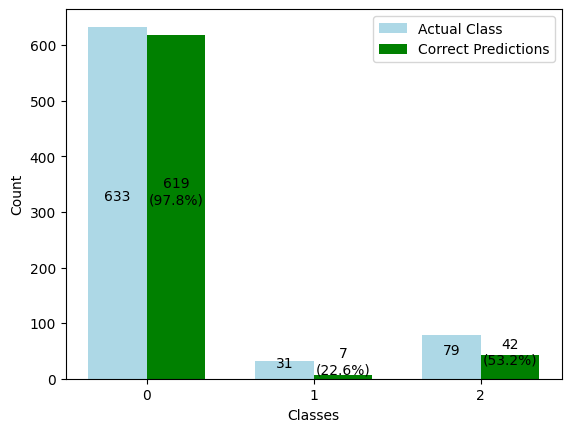

In [ ]:
# Hitung jumlah prediksi yang benar dan total untuk setiap kelas
correct_predictions = Counter()
total_predictions = Counter()

for true, pred in zip(y_test, y_pred_logreg):
    total_predictions[true] += 1
    if true == pred:
        correct_predictions[true] += 1

# Buat plot batang
labels = list(total_predictions.keys())
total_counts = list(total_predictions.values())
correct_counts = [correct_predictions[label] for label in labels]

fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, total_counts, bar_width, label='Actual Class', color='lightblue')
bar2 = ax.bar(index + bar_width, correct_counts, bar_width, label='Correct Predictions', color='green')

# Tambahkan label dan persentase
for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
    ax.text(i, total/2, str(total), ha='center', va='bottom')
    percentage = (correct / total) * 100 if total > 0 else 0
    ax.text(i + bar_width, correct/2, f'{correct}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
# ax.set_title('Prediction Accuracy by Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

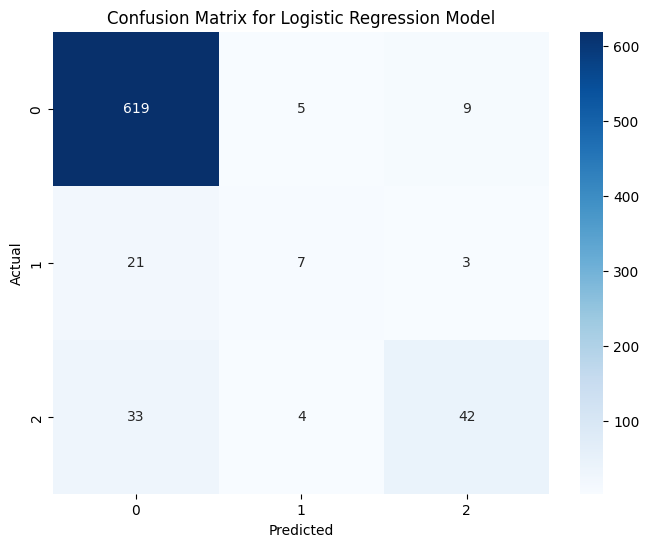

In [ ]:
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')

#### CNN

In [ ]:
# Konversi label y_train dan y_test menjadi one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=1))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'to_categorical' is not defined

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=1))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
_, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")

# Make predictions
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)
cnn_val_classes = np.argmax(y_test_cat, axis=1)

# Calculate metrics
cnn_accuracy = accuracy_score(cnn_val_classes, cnn_pred_classes)
cnn_precision_weighted = precision_score(np.argmax(y_test_cat, axis=1), cnn_pred_classes, average='weighted')
cnn_recall_weighted = recall_score(np.argmax(y_test_cat, axis=1), cnn_pred_classes, average='weighted')
cnn_f1_weighted = f1_score(np.argmax(y_test_cat, axis=1), cnn_pred_classes, average='weighted')

print(classification_report(y_test, cnn_pred_classes))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 73s 335ms/step - accuracy: 0.8411 - loss: 0.4780
Epoch 2/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 78s 319ms/step - accuracy: 0.9235 - loss: 0.1942
Epoch 3/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 83s 323ms/step - accuracy: 0.9658 - loss: 0.1065
Epoch 4/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 82s 322ms/step - accuracy: 0.9792 - loss: 0.0621
Epoch 5/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 81s 321ms/step - accuracy: 0.9926 - loss: 0.0299
Epoch 6/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 83s 325ms/step - accuracy: 0.9955 - loss: 0.0175
Epoch 7/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 68s 326ms/step - accuracy: 0.9960 - loss: 0.0108
Epoch 8/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 82s 324ms/step - accuracy: 0.9974 - loss: 0.0069
Epoch 9/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 82s 326ms/step - accuracy: 0.9986 - loss: 0.0061
Epoch 10/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 80s 315ms/step - accuracy: 0.9969 - loss: 0.0066
CNN Accuracy: 90.71%
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
              precision    recall  f1-score   su

In [ ]:
acc_cnn = accuracy_score(y_test, cnn_pred_classes)
prec_cnn = precision_score(y_test, cnn_pred_classes, average='weighted')
recall_cnn = recall_score(y_test, cnn_pred_classes, average='weighted')
f1_cnn = f1_score(y_test, cnn_pred_classes, average='weighted')

In [ ]:
print(f'Accuracy Score   : {(acc_cnn * 100):.2f}')
print(f'Precision Score  : {(prec_cnn * 100):.2f}')
print(f'Recall Score     : {(recall_cnn * 100):.2f}')
print(f'f1-score         : {(f1_cnn * 100):.2f}')

Accuracy Score   : 90.71
Precision Score  : 89.90
Recall Score     : 90.71
f1-score         : 90.17


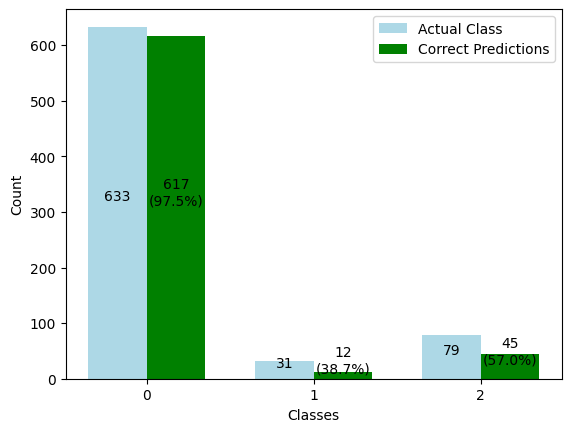

In [ ]:
# Hitung jumlah prediksi yang benar dan total untuk setiap kelas
correct_predictions = Counter()
total_predictions = Counter()

for true, pred in zip(y_test, cnn_pred_classes):
    total_predictions[true] += 1
    if true == pred:
        correct_predictions[true] += 1

# Buat plot batang
labels = list(total_predictions.keys())
total_counts = list(total_predictions.values())
correct_counts = [correct_predictions[label] for label in labels]

fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, total_counts, bar_width, label='Actual Class', color='lightblue')
bar2 = ax.bar(index + bar_width, correct_counts, bar_width, label='Correct Predictions', color='green')

# Tambahkan label dan persentase
for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
    ax.text(i, total/2, str(total), ha='center', va='bottom')
    percentage = (correct / total) * 100 if total > 0 else 0
    ax.text(i + bar_width, correct/2, f'{correct}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
# ax.set_title('Prediction Accuracy by Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Text(0.5, 1.0, 'Confusion Matrix for CNN Model')

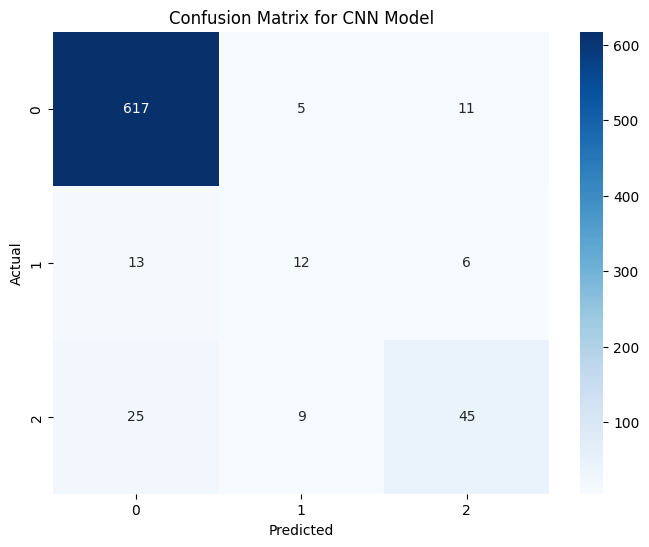

In [ ]:
cm = confusion_matrix(y_test, cnn_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN Model')

#### Hybrid Model

In [ ]:
svm_proba = svc.predict_proba(X_test)
logreg_proba = logreg.predict_proba(X_test)
cnn_proba = cnn_pred

avg_proba = (svm_proba + logreg_proba + cnn_proba) / 3
soft_voting = np.argmax(avg_proba, axis=1)

In [ ]:
# Hybrid model with voting
final_pred = []

for i in range(len(X_test)):
    if y_pred_svm[i] == y_pred_logreg[i] or y_pred_svm[i] == cnn_pred_classes[i]:
        final_pred.append(y_pred_svm[i])
    elif y_pred_logreg[i] == cnn_pred_classes[i]:
        final_pred.append(y_pred_logreg[i])
    else:
        final_pred.append(soft_voting[i])

# Menampilkan laporan klasifikasi dari model hybrid
print("Hybrid Model Classification Report:")
print(classification_report(y_test, final_pred))

Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       633
           1       0.43      0.32      0.37        31
           2       0.76      0.56      0.64        79

    accuracy                           0.90       743
   macro avg       0.71      0.62      0.66       743
weighted avg       0.89      0.90      0.90       743



In [ ]:
acc_hybrid = accuracy_score(y_test, final_pred)
prec_hybrid = precision_score(y_test, final_pred, average='weighted')
recall_hybrid = recall_score(y_test, final_pred, average='weighted')
f1_hybrid = f1_score(y_test, final_pred, average='weighted')

print(f'Accuracy Score   : {(acc_hybrid * 100):.2f}')
print(f'Precision Score  : {(prec_hybrid * 100):.2f}')
print(f'Recall Score     : {(recall_hybrid * 100):.2f}')
print(f'f1-score         : {(f1_hybrid * 100):.2f}')

Accuracy Score   : 90.44
Precision Score  : 89.41
Recall Score     : 90.44
f1-score         : 89.69


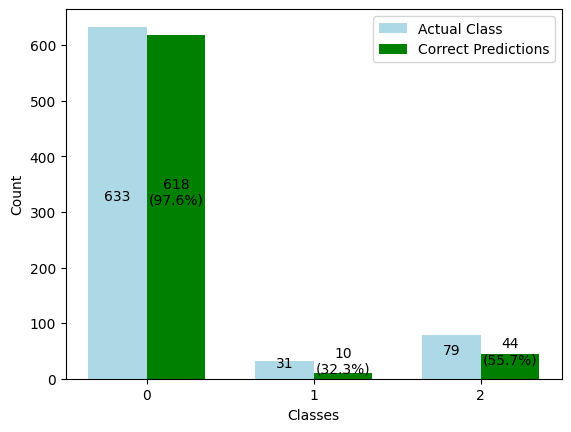

In [ ]:
# Hitung jumlah prediksi yang benar dan total untuk setiap kelas
correct_predictions = Counter()
total_predictions = Counter()

for true, pred in zip(y_test, final_pred):
    total_predictions[true] += 1
    if true == pred:
        correct_predictions[true] += 1

# Buat plot batang
labels = list(total_predictions.keys())
total_counts = list(total_predictions.values())
correct_counts = [correct_predictions[label] for label in labels]

fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, total_counts, bar_width, label='Actual Class', color='lightblue')
bar2 = ax.bar(index + bar_width, correct_counts, bar_width, label='Correct Predictions', color='green')

# Tambahkan label dan persentase
for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
    ax.text(i, total/2, str(total), ha='center', va='bottom')
    percentage = (correct / total) * 100 if total > 0 else 0
    ax.text(i + bar_width, correct/2, f'{correct}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
# ax.set_title('Prediction Accuracy by Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Hybrid Model')

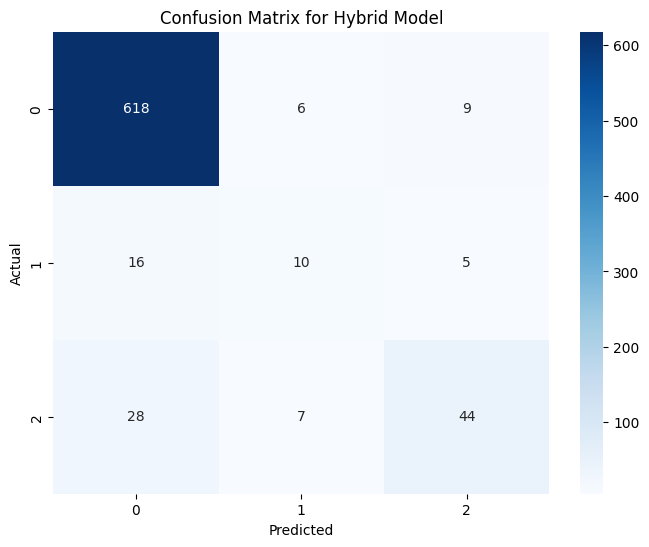

In [ ]:
cm = confusion_matrix(y_test, final_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Hybrid Model')

In [ ]:
count_correct = []
for i in range (len(y_test)):
  if y_test[i] == final_pred[i]:
    count_correct.append(1)
  else:
    count_correct.append(0)

acc_conf = sum(count_correct)/len(y_test)

print(f'SVM Accuracy : {acc_svm}')
print(f'Logistic Regression Accuracy : {acc_logreg}')
print(f'CNN Accuracy : {acc_cnn}')
print(f'Hybrid Model Accuracy : {acc_hybrid}')

if acc_conf == acc_hybrid :
  print('accuracy hybrid model and confusion matrix is match')
else:
  print('accuracy hybrid model and confusion matrix is not match')

SVM Accuracy : 0.8909825033647375
Logistic Regression Accuracy : 0.8990578734858681
CNN Accuracy : 0.9071332436069987
Hybrid Model Accuracy : 0.9044414535666218
accuracy hybrid model and confusion matrix is match


In [ ]:
label_data = {'y_test' : y_test, 'pred_svm' : y_pred_svm, 'pred_logreg' : y_pred_logreg, 'pred_cnn' : cnn_pred_classes, 'pred_hybrid' : final_pred}
label_data = pd.DataFrame(label_data)
label_data.to_csv('/content/drive/MyDrive/Tugas Akhir/hasil_model_krl.csv', index=False)
label_data

,y_test,pred_svm,pred_logreg,pred_cnn,pred_hybrid
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
738,0,0,0,0,0
739,0,0,0,0,0
740,0,0,0,0,0
741,0,2,0,2,2


In [ ]:
data_predict = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/hasil_model_krl.csv')
data_predict.head()

,y_test,pred_svm,pred_logreg,pred_cnn,pred_hybrid
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,0


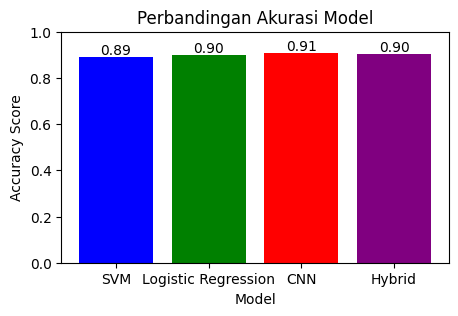

In [ ]:
# Data Akurasi
models = ['SVM', 'Logistic Regression', 'CNN', 'Hybrid']
accuracy_scores = [acc_svm, acc_logreg, acc_cnn, acc_hybrid]

# Membuat plot batang
plt.figure(figsize=(5, 3))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1

# Menampilkan nilai akurasi di atas setiap batang
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()


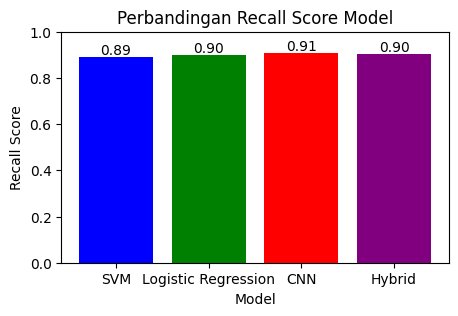

In [ ]:
# prompt: buatkan perbandingan recall score dari 4 model

import matplotlib.pyplot as plt
# Data Recall Score
models = ['SVM', 'Logistic Regression', 'CNN', 'Hybrid']
recall_scores = [recall_svm, recall_logreg, recall_cnn, recall_hybrid]

# Membuat plot batang
plt.figure(figsize=(5, 3))
plt.bar(models, recall_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Perbandingan Recall Score Model')
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1

# Menampilkan nilai recall score di atas setiap batang
for i, score in enumerate(recall_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()


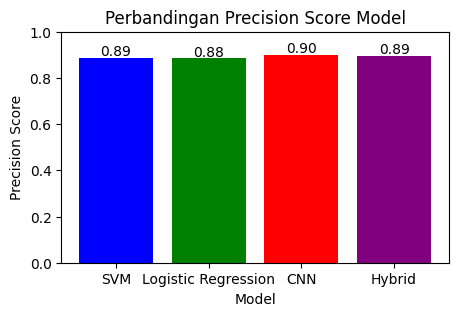

In [ ]:
# prompt: perbandingan precision 4 model

import matplotlib.pyplot as plt
# Data Precision Score
models = ['SVM', 'Logistic Regression', 'CNN', 'Hybrid']
precision_scores = [prec_svm, prec_logreg, prec_cnn, prec_hybrid]

# Membuat plot batang
plt.figure(figsize=(5, 3))
plt.bar(models, precision_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Perbandingan Precision Score Model')
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1

# Menampilkan nilai precision score di atas setiap batang
for i, score in enumerate(precision_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()


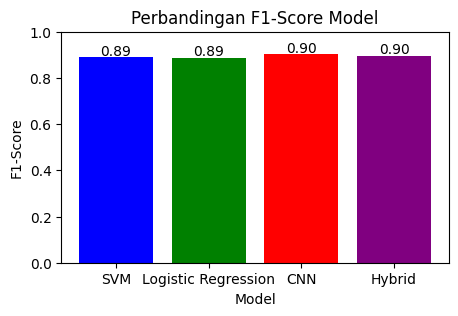

In [ ]:
# prompt: perbandingan f1 score 4 model

import matplotlib.pyplot as plt
# Data F1-Score
models = ['SVM', 'Logistic Regression', 'CNN', 'Hybrid']
f1_scores = [f1_svm, f1_logreg, f1_cnn, f1_hybrid]

# Membuat plot batang
plt.figure(figsize=(5, 3))
plt.bar(models, f1_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Perbandingan F1-Score Model')
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1

# Menampilkan nilai F1-Score di atas setiap batang
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()


In [ ]:
print('Akurasi')
print(f'SVM Accuracy : {acc_svm:.2f}')
print(f'Logistic Regression Accuracy : {acc_logreg:.2f}')
print(f'CNN Accuracy : {acc_cnn:.2f}')
print(f'Hybrid Model Accuracy : {acc_hybrid:.2f}\n')
print('precision')
print(f'SVM Precision : {prec_svm:.2f}')
print(f'Logistic Regression Precision : {prec_logreg:.2f}')
print(f'CNN Precision : {prec_cnn:.2f}')
print(f'Hybrid Model Precision : {prec_hybrid:.2f}\n')
print('recall')
print(f'SVM Recall : {recall_svm:.2f}')
print(f'Logistic Regression Recall : {recall_logreg:.2f}')
print(f'CNN Recall : {recall_cnn:.2f}')
print(f'Hybrid Model Recall : {recall_hybrid:.2f}\n')
print('f1-score')
print(f'SVM F1-Score : {f1_svm:.2f}')
print(f'Logistic Regression F1-Score : {f1_logreg:.2f}')
print(f'CNN F1-Score : {f1_cnn:.2f}')
print(f'Hybrid Model F1-Score : {f1_hybrid:.2f}')

Akurasi
SVM Accuracy : 0.89
Logistic Regression Accuracy : 0.90
CNN Accuracy : 0.91
Hybrid Model Accuracy : 0.90

precision
SVM Precision : 0.89
Logistic Regression Precision : 0.88
CNN Precision : 0.90
Hybrid Model Precision : 0.89

recall
SVM Recall : 0.89
Logistic Regression Recall : 0.90
CNN Recall : 0.91
Hybrid Model Recall : 0.90

f1-score
SVM F1-Score : 0.89
Logistic Regression F1-Score : 0.89
CNN F1-Score : 0.90
Hybrid Model F1-Score : 0.90


In [ ]:
count_correct = []
for i in range (len(y_test)):
  if y_test[i] == final_pred[i]:
    count_correct.append(1)
  else:
    count_correct.append(0)

acc_conf = sum(count_correct)/len(y_test)

if acc_conf == acc_hybrid :
  print('hybrid model and confusion matrix is match')
else:
  print('hybrid model and confusion matrix is not match')

hybrid model and confusion matrix is match
